In [118]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error 
sb.set()

pd.options.display.max_rows = 999

*We start by importing the dataset and doing some basic exploration*

In [119]:
life=pd.read_csv("dataset/Life Expectancy Data.csv")
print("Data dimensions",life.shape)
life.head()

Data dimensions (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


*The following is a description of dataset from kaggle*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from 2010 to 2015. A total of 15 years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: Probability of dying between 15 and 60 years per 1000 population. Both male and female. <br>
>**6) Infant deaths**: Number of Infant Deaths per 1000 population <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%) <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%) <br>
>**10) Measles**: Measles - number of reported cases per 1000 population <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: Number of under-five deaths per 1000 population <br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%) <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%) <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) <br>
>**16) HIV/AIDS**: Deaths per 1 000 live births HIV/AIDS (0-4 years) <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 10-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (&) <br>
>**20) Thinness 5-9 years**:Prevalence of thinness among children for Age 5 to 9(%) <br>
>**21) Income composition**:Human Development Index in terms of income composition of resources (index ranging from 0 to 1) <br>
>**22) Schooling**: Number of years of Schooling(years) <br>

In [121]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [122]:
print("Number of unqiue countries in the dataset:",life["Country"].nunique())

print(life["Country"].value_counts())


Number of unqiue countries in the dataset: 193
Afghanistan                                             16
Peru                                                    16
Nicaragua                                               16
Niger                                                   16
Nigeria                                                 16
Norway                                                  16
Oman                                                    16
Pakistan                                                16
Panama                                                  16
Papua New Guinea                                        16
Paraguay                                                16
Philippines                                             16
Lebanon                                                 16
Poland                                                  16
Portugal                                                16
Qatar                                                   16
Republic 

*From this we observe that there are 193 countries, and all countries except Tuvalu, Cook Islands,Marshall Islands, Monaco, Palau,Niue,San Marino,Nauru,Saint Kitts and Nevis,Dominica have 16 years worth of data*

*We will attempt to create a aggregated row for each country, by removing the year variable for ease of comparison between countries, call it life2*

In [131]:
unique_countries=pd.Series(life["Country"].unique())
life2=life[0:0] #empty new dataframe with only header
for country in unique_countries:
    extract=life[life["Country"]==country]
    newrow={}
    for col in extract.columns:
        if extract[col].dtype != 'object' and col != 'Year':
            newrow[col]=extract[col].mean()
        else:
            newrow[col]=extract[col].unique() #just take out the first row, the name of the country, since all rows the same
    newrow=pd.DataFrame(newrow,index=range(16))
    life2=pd.concat([life2,pd.DataFrame(newrow.iloc[[0]])])
life2=life2.drop(['Year'],axis=1) #remove the year column
life2.index=range(193)
life2

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,48.375000,8.252500,52.312500,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,Developing,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,98.125000,5.945625,98.062500,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,Developing,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,91.750000,4.604000,91.875000,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,Developing,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,46.125000,3.919333,47.687500,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,Developing,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,96.937500,4.791333,98.312500,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375
5,Argentina,Developing,75.15625,106.0000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,...,93.375000,6.912667,92.375000,0.10000,6998.575103,2.012120e+07,1.07500,0.95000,0.794125,16.50625
6,Armenia,Developing,73.40000,117.3750,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,...,89.125000,4.861333,87.375000,0.10000,1999.986318,1.015165e+06,2.03750,2.11250,0.698375,11.78750
7,Australia,Developed,81.81250,63.1875,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,...,86.750000,8.836667,86.875000,0.10000,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.03750
8,Austria,Developed,81.48125,65.7500,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,...,86.000000,4.715333,86.750000,0.10000,33827.476309,6.474880e+06,1.73125,1.93750,0.862375,15.38750
9,Azerbaijan,Developing,70.73125,115.1875,6.0625,0.992000,131.148747,59.214286,598.1875,43.84375,...,75.812500,5.679333,82.312500,0.10000,3302.947807,2.157370e+06,2.90000,2.94375,0.702687,11.35000


*now we do some basic EDA*

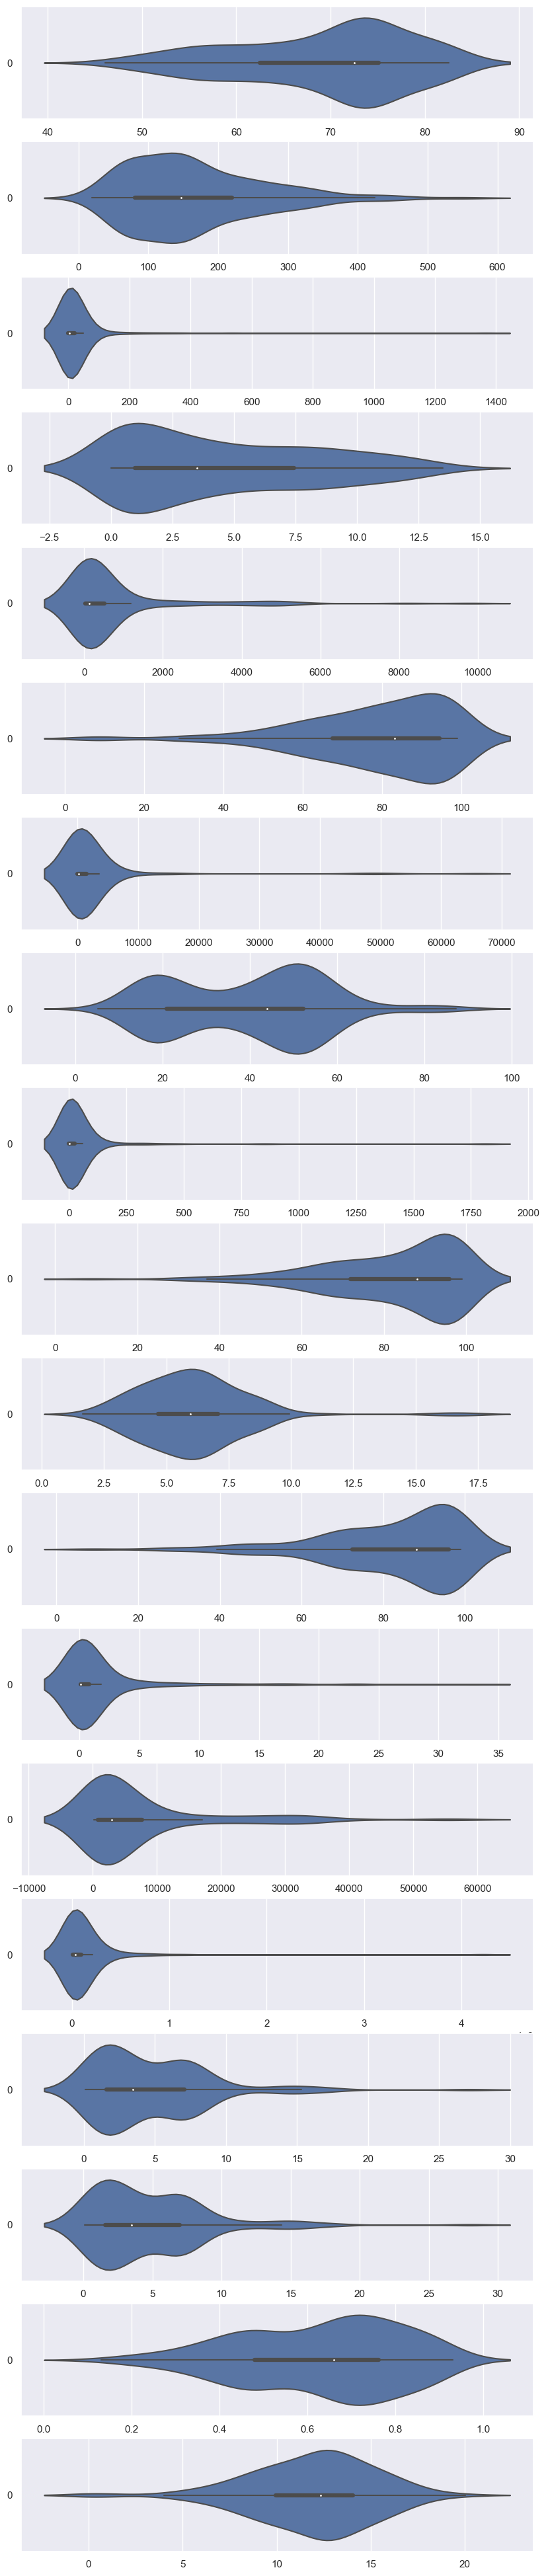

In [142]:
f, axes = plt.subplots(19, 1, figsize=(10, 50))
life2_num=life2.drop(['Country','Status'],axis=1)

count = 0
for var in life2_num:
    sb.violinplot(data = life2_num[var], orient = "h", ax = axes[count])
    count += 1

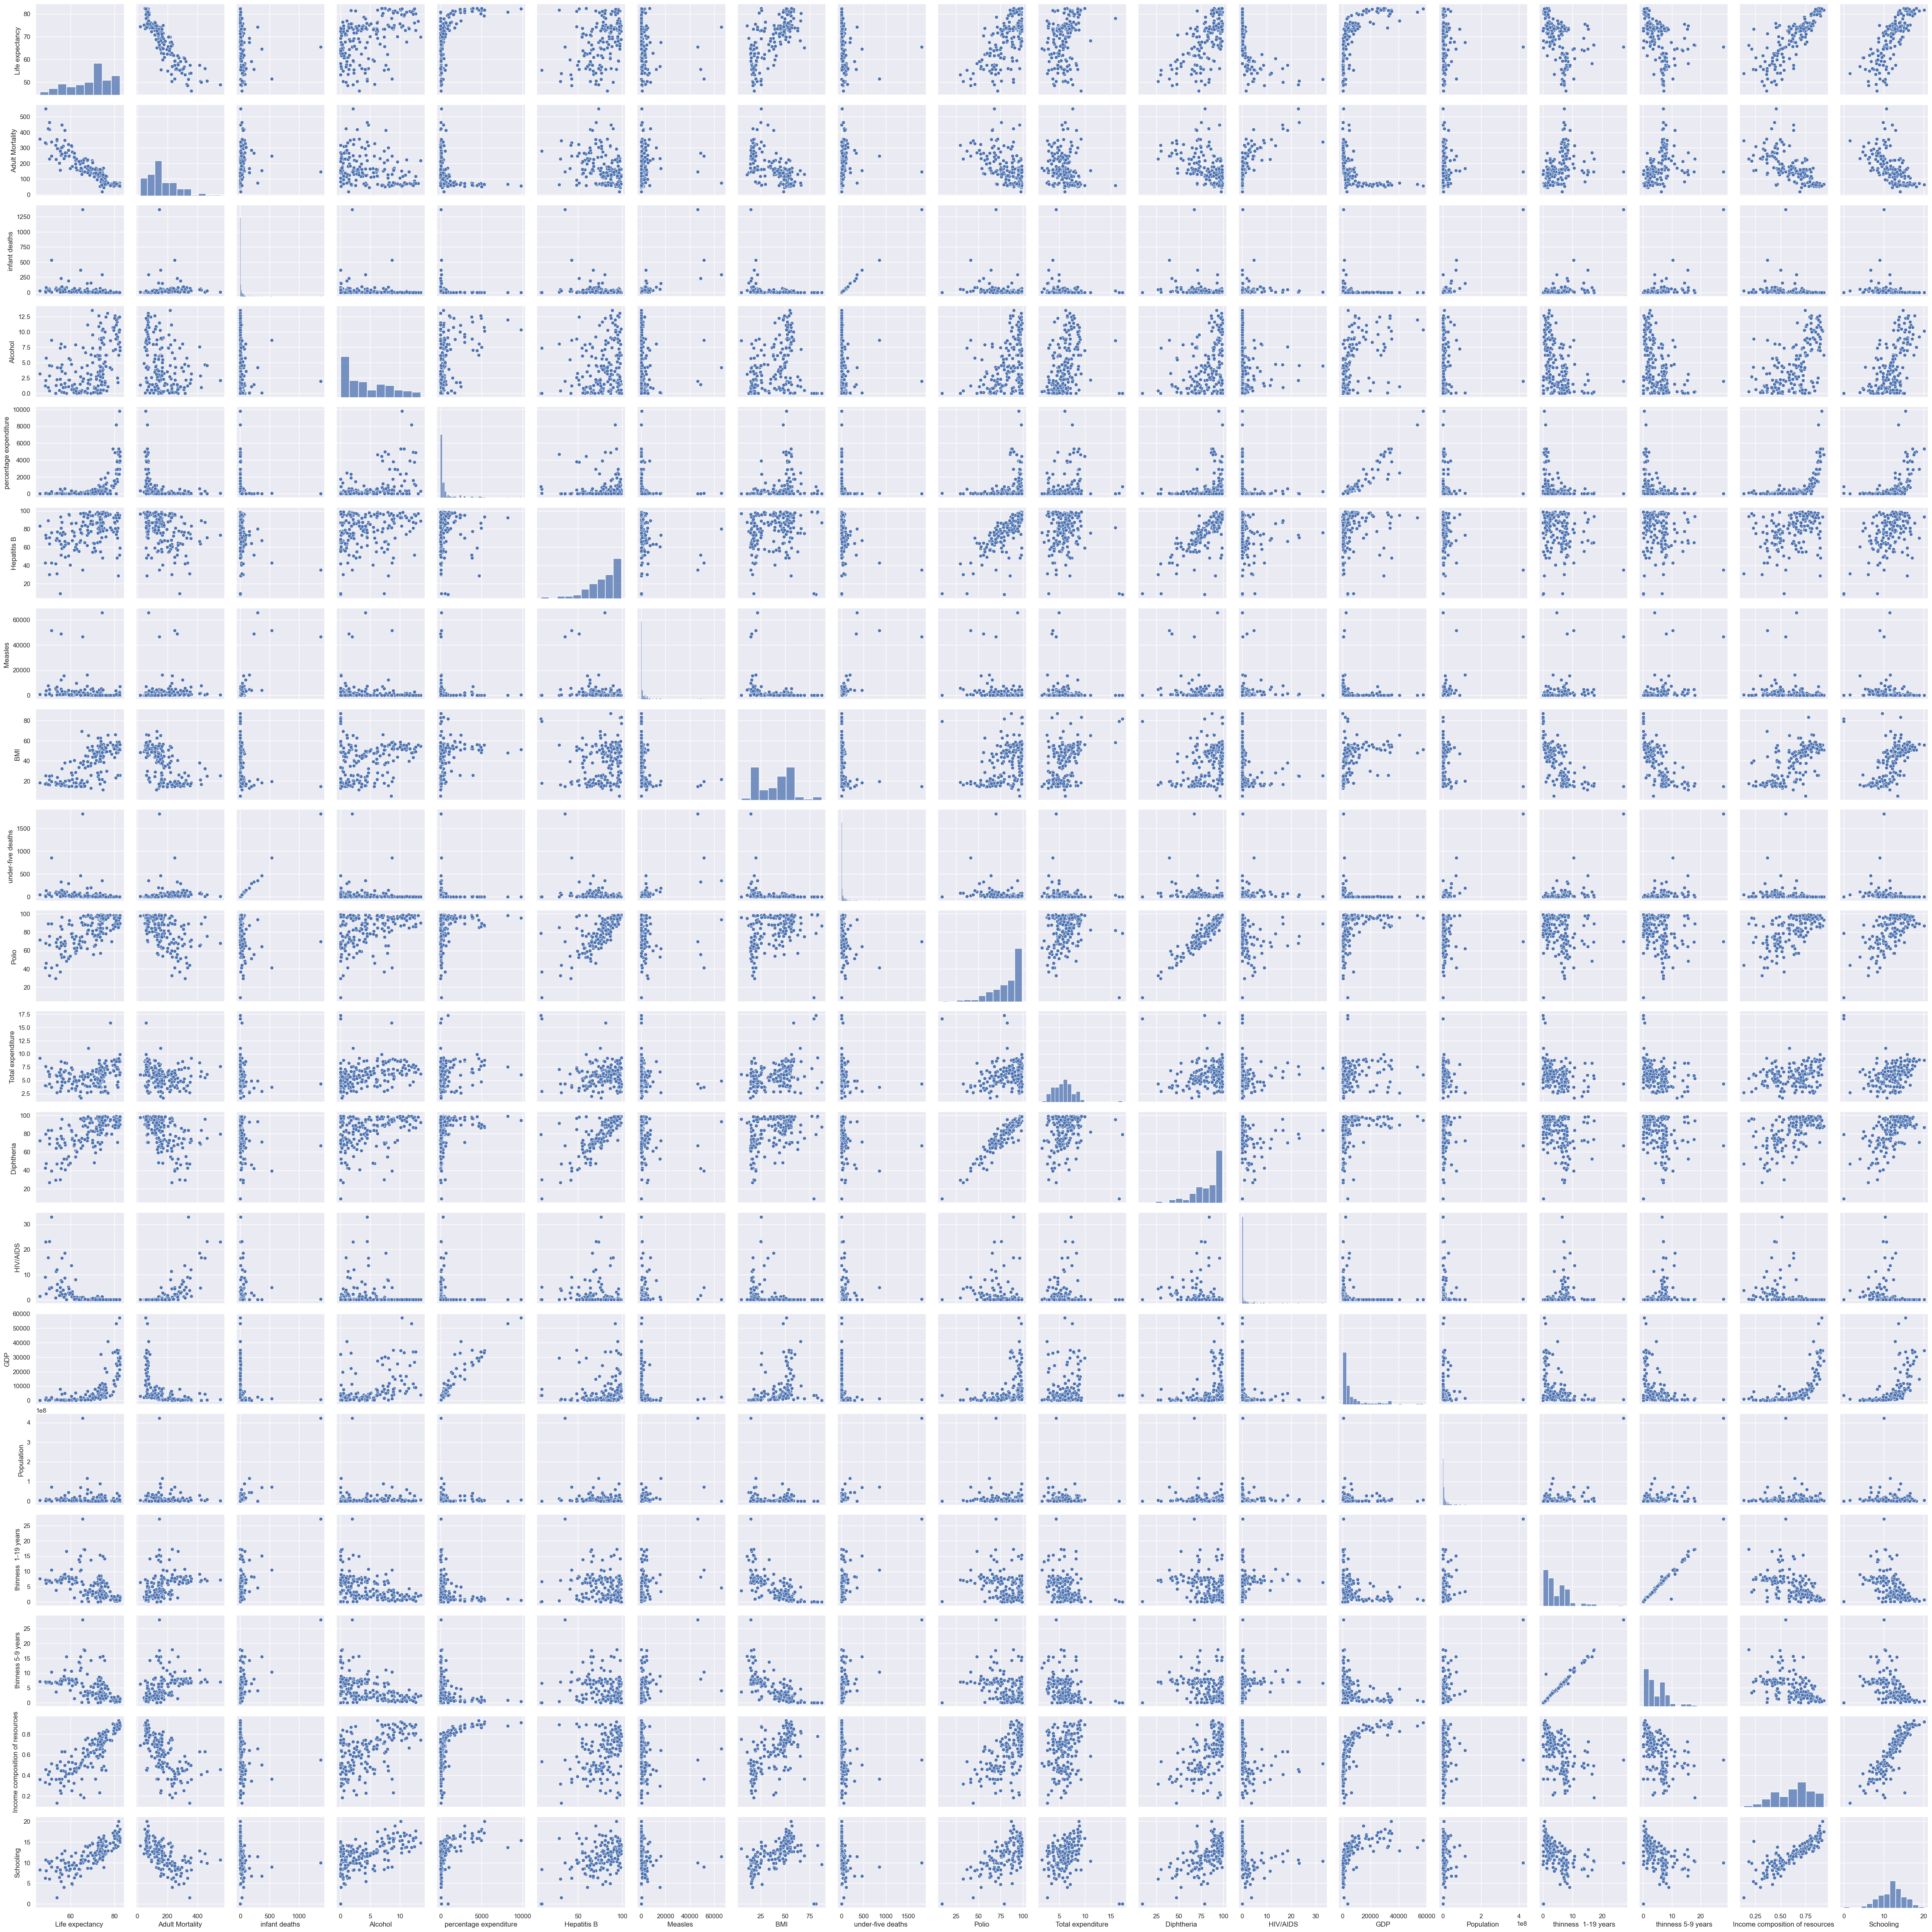

In [144]:
sb.pairplot(life2_num)
plt.show()

In [ ]:

# list=["Tuvalu", "Cook Islands","Marshall Islands", "Monaco", "Palau","Niue","San Marino","Nauru","Saint Kitts","Nevis","Dominica"]
# for i in list:
#     data.drop(data[data["Country"]==i].index,inplace=True)
# data


In [ ]:
# data.drop(data[data["Population"].isnull()].index,inplace=True)
# data.isnull().sum()